# Seoul Bike Sharing Demand

The dataset contains information about the bike sharing system in Seoul, South Korea. The data was collected between 2017 and 2018. The dataset contains 8760 rows and 14 columns.

**Data Source**: [UCI Machine Learning Repository, Seoul Bike Sharing Demand Dataset](https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand)

In [1]:
# Importing necessary libraries
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import RobustScaler
from lightgbm import LGBMRegressor
import lightgbm as lgb

pd.pandas.set_option('display.max_columns',None)
%matplotlib inline

# Loading the dataset
file_path = './seoulBikeData.csv'
df = pd.read_csv(file_path, encoding='unicode_escape')

# Preprocessing date information
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['Date'] = pd.to_datetime(df['Date'])
df['Day_of_Week'] = df['Date'].dt.dayofweek
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

df

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0    2017-12-01                254     0             -5.2           37   
1    2017-12-01                204     1             -5.5           38   
2    2017-12-01                173     2             -6.0           39   
3    2017-12-01                107     3             -6.2           40   
4    2017-12-01                 78     4             -6.0           36   
...         ...                ...   ...              ...          ...   
8755 2018-11-30               1003    19              4.2           34   
8756 2018-11-30                764    20              3.4           37   
8757 2018-11-30                694    21              2.6           39   
8758 2018-11-30                712    22              2.1           41   
8759 2018-11-30                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0                  2.2              2000                      -17.6   
1                  0.8              2000                      -17.6   
2                  1.0              2000                      -17.7   
3                  0.9              2000                      -17.6   
4                  2.3              2000                      -18.6   
...                ...               ...                        ...   
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
0                         0.0           0.0            0.0  Winter   
1                         0.0           0.0            0.0  Winter   
2                         0.0           0.0            0.0  Winter   
3                         0.0           0.0            0.0  Winter   
4                         0.0           0.0            0.0  Winter   
...                       ...           ...            ...     ...   
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  Day_of_Week  Month  Year  
0     No Holiday             Yes            4     12  2017  
1     No Holiday             Yes            4     12  2017  
2     No Holiday             Yes            4     12  2017  
3     No Holiday             Yes            4     12  2017  
4     No Holiday             Yes            4     12  2017  
...          ...             ...          ...    ...   ...  
8755  No Holiday             Yes            4     11  2018  
8756  No Holiday             Yes            4     11  2018  
8757  No Holiday             Yes            4     11  2018  
8758  No Holiday             Yes            4     11  2018  
8759  No Holiday             Yes            4     11  2018  

[8760 rows x 17 columns]

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [3]:
df.describe()

Rented Bike Count         Hour  Temperature(°C)  Humidity(%)  \
count        8760.000000  8760.000000      8760.000000  8760.000000   
mean          704.602055    11.500000        12.882922    58.226256   
std           644.997468     6.922582        11.944825    20.362413   
min             0.000000     0.000000       -17.800000     0.000000   
25%           191.000000     5.750000         3.500000    42.000000   
50%           504.500000    11.500000        13.700000    57.000000   
75%          1065.250000    17.250000        22.500000    74.000000   
max          3556.000000    23.000000        39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count       8760.000000       8760.000000                8760.000000   
mean           1.724909       1436.825799                   4.073813   
std            1.036300        608.298712                  13.060369   
min            0.000000         27.000000                 -30.600000   
25%            0.900000        940.000000                  -4.700000   
50%            1.500000       1698.000000                   5.100000   
75%            2.300000       2000.000000                  14.800000   
max            7.400000       2000.000000                  27.200000   

       Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  Day_of_Week  \
count              8760.000000   8760.000000    8760.000000  8760.000000   
mean                  0.569111      0.148687       0.075068     3.002740   
std                   0.868746      1.128193       0.436746     1.998056   
min                   0.000000      0.000000       0.000000     0.000000   
25%                   0.000000      0.000000       0.000000     1.000000   
50%                   0.010000      0.000000       0.000000     3.000000   
75%                   0.930000      0.000000       0.000000     5.000000   
max                   3.520000     35.000000       8.800000     6.000000   

             Month         Year  
count  8760.000000  8760.000000  
mean      6.526027  2017.915068  
std       3.448048     0.278796  
min       1.000000  2017.000000  
25%       4.000000  2018.000000  
50%       7.000000  2018.000000  
75%      10.000000  2018.000000  
max      12.000000  2018.000000

In [4]:
print("Duplicate entry in data:",len(df[df.duplicated()]))

Duplicate entry in data: 0


## **_Data Filtering_**

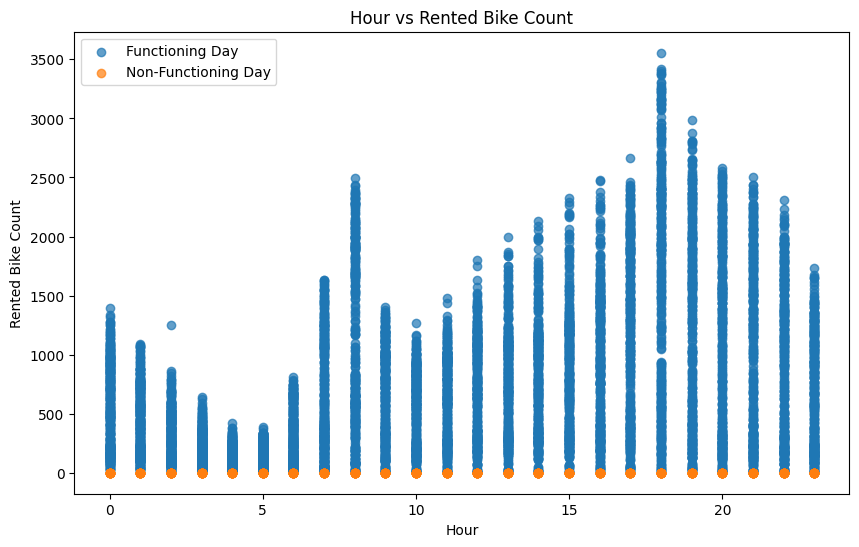

In [5]:
import matplotlib.pyplot as plt

# Plotting Hour vs Rented Bike Count for Functioning and Non-Functioning Days
plt.figure(figsize=(10, 6))
plt.scatter(df[df['Functioning Day']=='Yes']['Hour'], df[df['Functioning Day']=='Yes']['Rented Bike Count'], label='Functioning Day', alpha=0.7)
plt.scatter(df[df['Functioning Day']=='No']['Hour'], df[df['Functioning Day']=='No']['Rented Bike Count'], label='Non-Functioning Day', alpha=0.7)
plt.title('Hour vs Rented Bike Count')
plt.xlabel('Hour')
plt.ylabel('Rented Bike Count')
plt.legend()
plt.show()

In [6]:
# Grouping by functioning day and calculating the total Rented Bike Count
df.groupby('Functioning Day').sum()['Rented Bike Count'].sort_values(ascending = False).reset_index()

Functioning Day  Rented Bike Count
0             Yes            6172314
1              No                  0

In [7]:
#Removing data of non functional days (non rented days) so we do not use a column that we do not need
data=df.drop(df[df['Functioning Day'] == 'No'].index)

In [8]:
df_new=data.drop(['Functioning Day'], axis = 1)

In [9]:
#Checking DataFrame Shape After Removing Non Functional Day Rows And Functional Day Column
print("Filtered Dataframe with only rented bike days :",df_new.shape,"\n")

Filtered Dataframe with only rented bike days : (8465, 16) 


In [10]:
#Drop date and seperate it to day, month, year
df_new['Date'] = pd.to_datetime(df_new['Date']) 
df_new['Date']
df_new['Day']=df_new['Date'].dt.day
df_new['Month']=df_new['Date'].dt.month
df_new['Year']=df_new['Date'].dt.year
df_new.drop(columns=['Date'],inplace=True)

1. ## **_Exploratory Analysis and Visualization_**

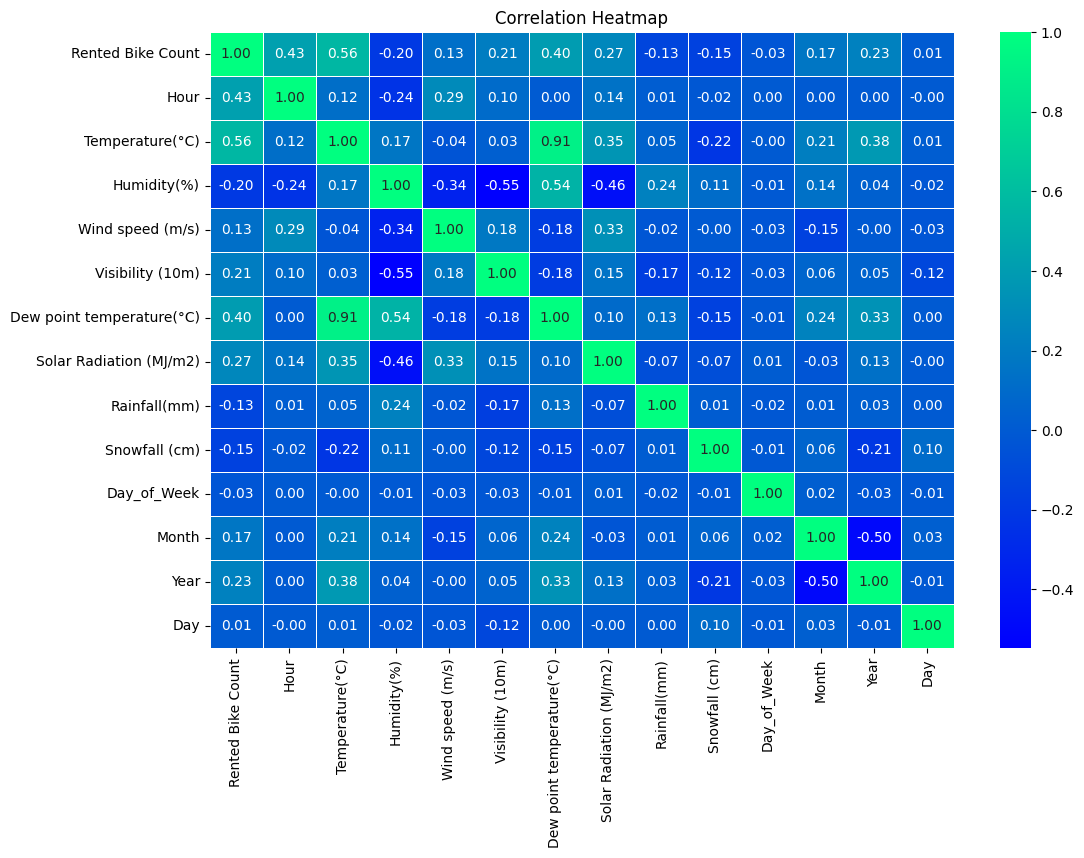

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = df_new.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='winter', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [12]:
df_new.drop(columns=["Dew point temperature(°C)", "Temperature(°C)"], inplace=True)

In [13]:
df_new.head()

Rented Bike Count  Hour  Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
0                254     0           37               2.2              2000   
1                204     1           38               0.8              2000   
2                173     2           39               1.0              2000   
3                107     3           40               0.9              2000   
4                 78     4           36               2.3              2000   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

   Day_of_Week  Month  Year  Day  
0            4     12  2017    1  
1            4     12  2017    1  
2            4     12  2017    1  
3            4     12  2017    1  
4            4     12  2017    1

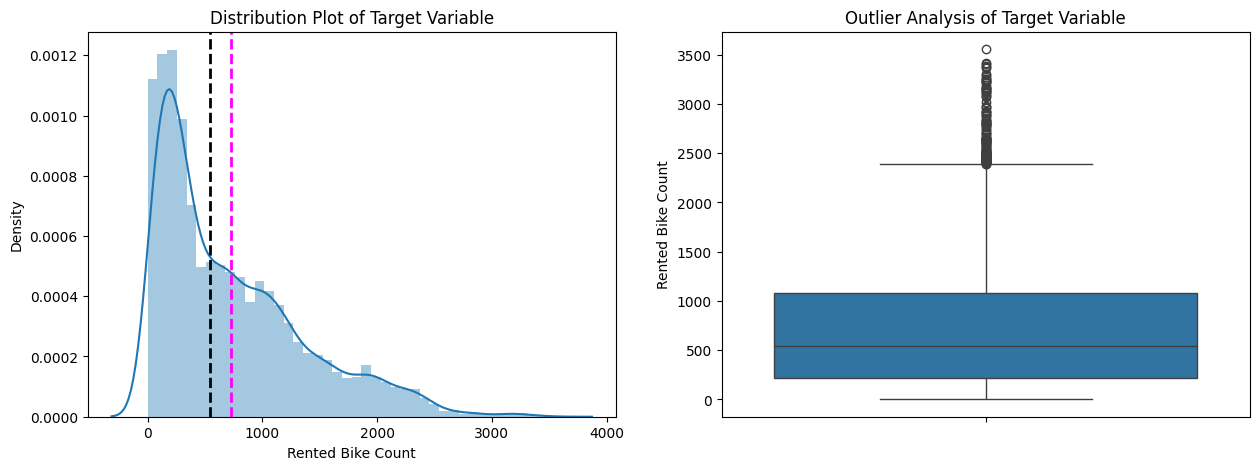

In [14]:
fig, ax = plt.subplots(1,2 , figsize = (15,5))

# Distribution plot of Rented Bike Count
dist =sns.distplot(df_new['Rented Bike Count'],hist=True, ax = ax[0])
dist.set(xlabel = 'Rented Bike Count', ylabel ='Density', title = 'Distribution Plot of Target Variable')

# mean line
dist.axvline(df_new['Rented Bike Count'].mean(), color='magenta', linestyle='dashed', linewidth=2)

# median line
dist.axvline(df_new['Rented Bike Count'].median(), color='black', linestyle='dashed', linewidth=2)

# Boxplot
box = sns.boxplot(df_new['Rented Bike Count'], ax= ax[1])
box.set(title = 'Outlier Analysis of Target Variable')
plt.show()

## **_Exploratory Analysis and Visualization_**

In [15]:
# Separate numerical and categorical variables
numerical_vars = df_new.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_vars = df_new.select_dtypes(include=['object']).columns.tolist()

numerical_vars, categorical_vars

(['Rented Bike Count',
  'Hour',
  'Humidity(%)',
  'Wind speed (m/s)',
  'Visibility (10m)',
  'Solar Radiation (MJ/m2)',
  'Rainfall(mm)',
  'Snowfall (cm)',
  'Day_of_Week',
  'Month',
  'Year',
  'Day'],
 ['Seasons', 'Holiday'])

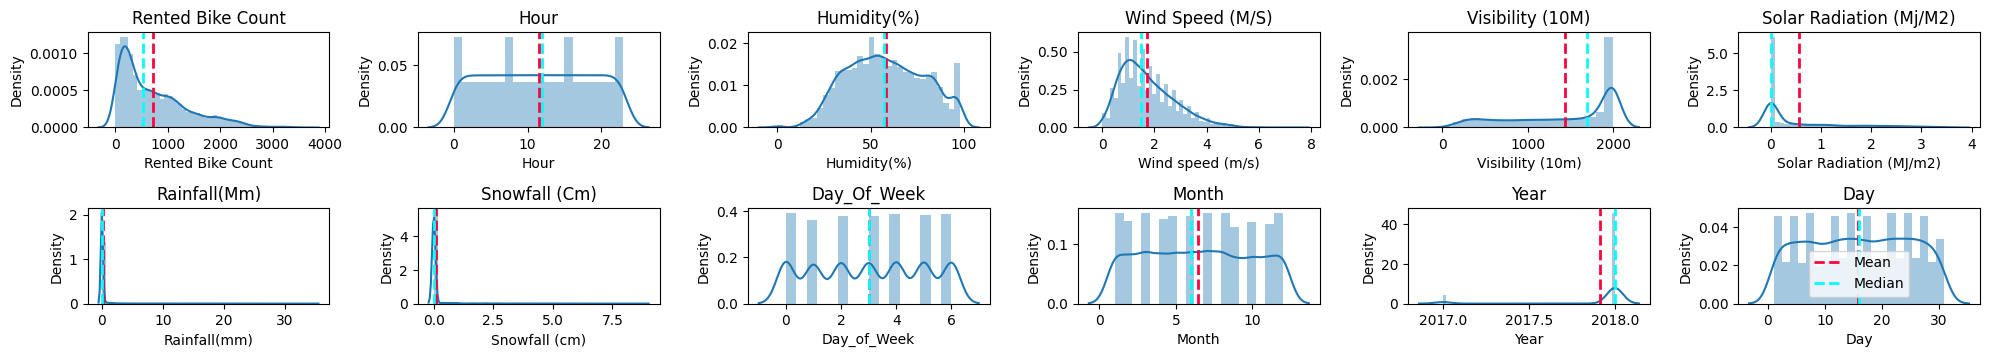

In [16]:
fig = plt.figure(figsize=(20, 5))

# Loop through numerical features
for index, column in enumerate(numerical_vars):
    # Check if the column exists in the DataFrame
    if column in df_new.columns:
        # Create subplots
        plt.subplot(3, 6, index + 1)
        
        # Plot the distribution using seaborn
        sns.distplot(df_new[column])
        
        # Get the feature data
        feature = df_new[column]
        
        # Add vertical lines for mean and median
        ax = plt.gca()
        ax.axvline(feature.mean(), color='#ff033e', linestyle='dashed', linewidth=2, label='Mean')
        ax.axvline(feature.median(), color='#00ffff', linestyle='dashed', linewidth=2, label='Median')
        
        # Set the plot title
        plt.title(f'{column.title()}')
        
        # Ensure tight layout
        plt.tight_layout()

# Show a legend for the mean and median lines
plt.legend(loc='best')

# Display the plots
plt.show()

In [17]:
# Loop through categorical features
for column in categorical_vars:
    # Check if the column exists in the DataFrame
    if column in df_new.columns:
        # Display the unique values of the categorical feature
        print(f'Unique values for {column}: {df_new[column].unique()}')

Unique values for Seasons: ['Winter' 'Spring' 'Summer' 'Autumn']
Unique values for Holiday: ['No Holiday' 'Holiday']


In [18]:
# We Calculate data for Seasons and Holiday
season_counts = df_new['Seasons'].value_counts()
holiday_counts = df_new['Holiday'].value_counts()

print('Season Counts:')
print(season_counts)
print('\nHoliday Counts:')
print(holiday_counts)

Season Counts:
Summer    2208
Winter    2160
Spring    2160
Autumn    1937
Name: Seasons, dtype: int64

Holiday Counts:
No Holiday    8057
Holiday        408
Name: Holiday, dtype: int64


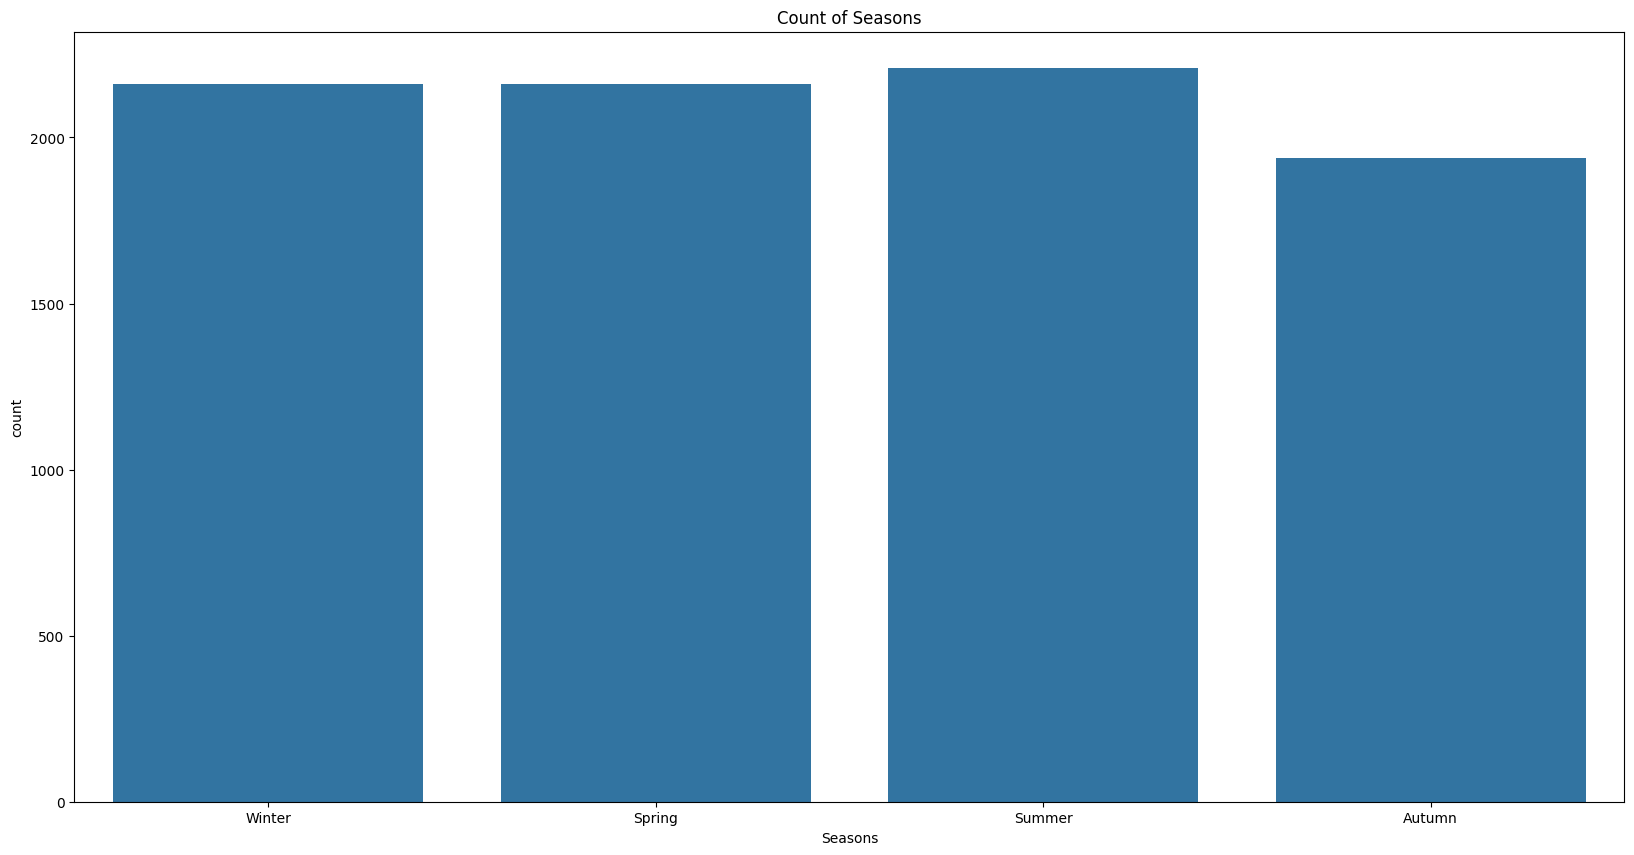

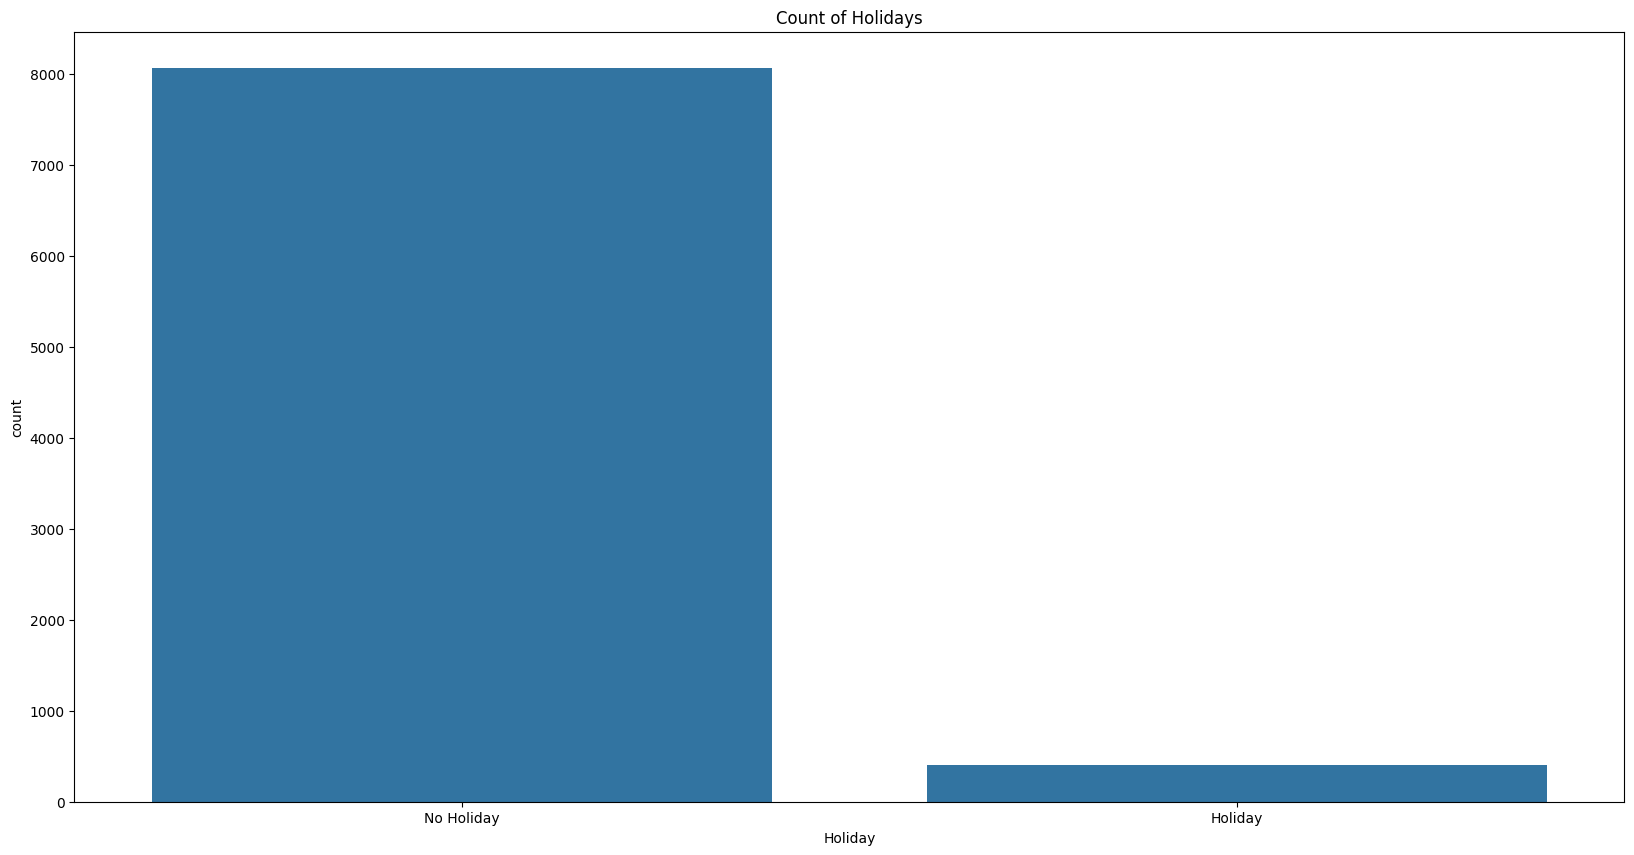

In [19]:
# Create a countplot with 'Seasons' on x-axis
plt.figure(figsize=(20, 10))
sns.countplot(data=df_new, x='Seasons')
plt.title('Count of Seasons')
plt.show()

# Create a countplot with 'Holiday' on x-axis
plt.figure(figsize=(20, 10))
sns.countplot(data=df_new, x='Holiday')
plt.title('Count of Holidays')
plt.show()

In [20]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode the 'Seasons' column
df_new['Seasons_encoded'] = label_encoder.fit_transform(df_new['Seasons'])

# Encode the 'Holiday' column
label_encoder = LabelEncoder()
df_new['Holiday_encoded'] = label_encoder.fit_transform(df_new['Holiday'])

# Display the updated DataFrame
print(df_new.head())

   Rented Bike Count  Hour  Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
0                254     0           37               2.2              2000   
1                204     1           38               0.8              2000   
2                173     2           39               1.0              2000   
3                107     3           40               0.9              2000   
4                 78     4           36               2.3              2000   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

   Day_of_Week  Month  Year  Day  Seasons_encoded 

In [21]:
season_holiday_counts = df_new.groupby(['Seasons', 'Holiday']).size()
season_holiday_counts


Seasons  Holiday   
Autumn   Holiday         96
         No Holiday    1841
Spring   Holiday         72
         No Holiday    2088
Summer   Holiday         48
         No Holiday    2160
Winter   Holiday        192
         No Holiday    1968
dtype: int64

In [22]:
df_new_encoded= df_new.apply(LabelEncoder().fit_transform)
df_new_encoded

Rented Bike Count  Hour  Humidity(%)  Wind speed (m/s)  \
0                   252     0           28                22   
1                   202     1           29                 8   
2                   171     2           30                10   
3                   105     3           31                 9   
4                    76     4           27                23   
...                 ...   ...          ...               ...   
8755                990    19           25                26   
8756                754    20           28                23   
8757                685    21           30                 3   
8758                703    22           32                10   
8759                579    23           34                13   

      Visibility (10m)  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  \
0                 1779                        0             0              0   
1                 1779                        0             0              0   
2                 1779                        0             0              0   
3                 1779                        0             0              0   
4                 1779                        0             0              0   
...                ...                      ...           ...            ...   
8755              1673                        0             0              0   
8756              1779                        0             0              0   
8757              1747                        0             0              0   
8758              1639                        0             0              0   
8759              1688                        0             0              0   

      Seasons  Holiday  Day_of_Week  Month  Year  Day  Seasons_encoded  \
0           3        1            4     11     0    0                3   
1           3        1            4     11     0    0                3   
2           3        1            4     11     0    0                3   
3           3        1            4     11     0    0                3   
4           3        1            4     11     0    0                3   
...       ...      ...          ...    ...   ...  ...              ...   
8755        0        1            4     10     1   29                0   
8756        0        1            4     10     1   29                0   
8757        0        1            4     10     1   29                0   
8758        0        1            4     10     1   29                0   
8759        0        1            4     10     1   29                0   

      Holiday_encoded  
0                   1  
1                   1  
2                   1  
3                   1  
4                   1  
...               ...  
8755                1  
8756                1  
8757                1  
8758                1  
8759                1  

[8465 rows x 16 columns]

In [23]:
df_new.groupby("Seasons").count()
df_new_encoded.groupby('Seasons').count()

Rented Bike Count  Hour  Humidity(%)  Wind speed (m/s)  \
Seasons                                                           
0                     1937  1937         1937              1937   
1                     2160  2160         2160              2160   
2                     2208  2208         2208              2208   
3                     2160  2160         2160              2160   

         Visibility (10m)  Solar Radiation (MJ/m2)  Rainfall(mm)  \
Seasons                                                            
0                    1937                     1937          1937   
1                    2160                     2160          2160   
2                    2208                     2208          2208   
3                    2160                     2160          2160   

         Snowfall (cm)  Holiday  Day_of_Week  Month  Year   Day  \
Seasons                                                           
0                 1937     1937         1937   1937  1937  1937   
1                 2160     2160         2160   2160  2160  2160   
2                 2208     2208         2208   2208  2208  2208   
3                 2160     2160         2160   2160  2160  2160   

         Seasons_encoded  Holiday_encoded  
Seasons                                    
0                   1937             1937  
1                   2160             2160  
2                   2208             2208  
3                   2160             2160

## **_Distribution and outliers_**

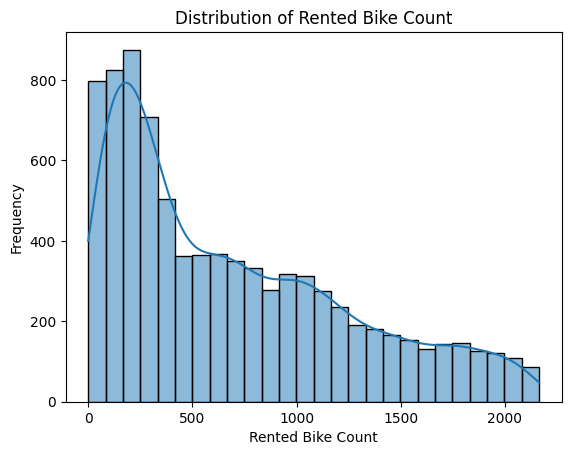

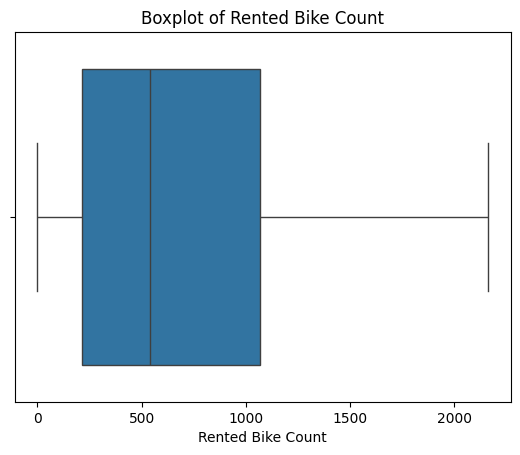

In [24]:
# Plot the distribution of the "Rented Bike Count" variable
sns.histplot(df_new_encoded['Rented Bike Count'], kde=True)
plt.title('Distribution of Rented Bike Count')
plt.xlabel('Rented Bike Count')
plt.ylabel('Frequency')
plt.show()

# Detect outliers using boxplot
sns.boxplot(x=df_new_encoded['Rented Bike Count'])
plt.title('Boxplot of Rented Bike Count')
plt.xlabel('Rented Bike Count')
plt.show()

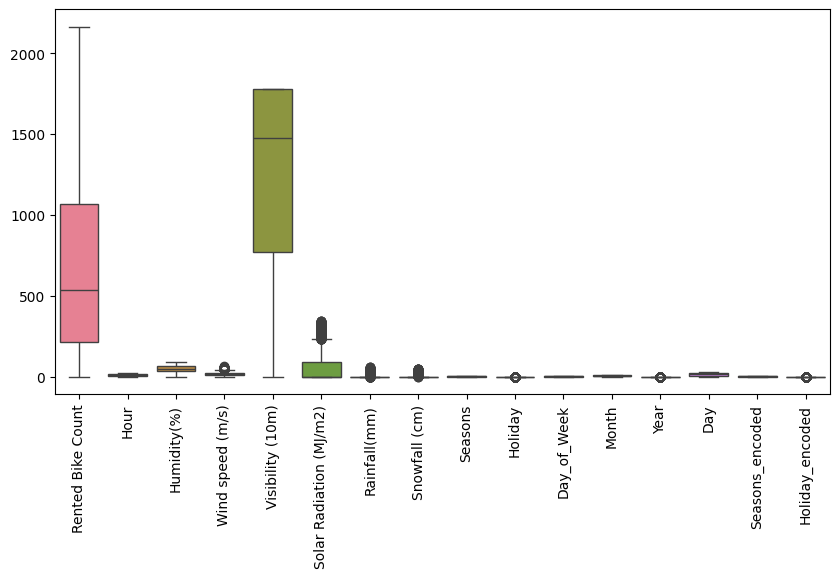

In [25]:
plt.figure(figsize=(10,5))   # for define chart size
plt.xticks(rotation =90)     #plot X-axis ticks in 90 degree rotation for clear visible
sns.boxplot(data = df_new_encoded)    #box plot of le_df data frame raw data
plt.show()

## **_Splitting Test & Train Set_**

In [26]:
X=df_new_encoded.drop('Rented Bike Count',axis=1)
y=df_new_encoded['Rented Bike Count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)

(6772, 15)
(1693, 15)


In [27]:
# Training linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Training random forest regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Training gradient boosting regression model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Training LightGBM regression model
lgb_model = lgb.LGBMRegressor(n_estimators=100, random_state=42)
lgb_model.fit(X_train, y_train)

# Making predictions
lr_predictions = lr_model.predict(X_test).clip(min=0)
rf_predictions = rf_model.predict(X_test).clip(min=0)
gb_predictions = gb_model.predict(X_test).clip(min=0)
lgb_predictions = lgb_model.predict(X_test).clip(min=0)

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluate Linear Regression model
lr_mae = mean_absolute_error(y_test, lr_predictions)
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)

# Evaluate Random Forest model
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

# Evaluate Gradient Boosting model
gb_mae = mean_absolute_error(y_test, gb_predictions)
gb_mse = mean_squared_error(y_test, gb_predictions)
gb_r2 = r2_score(y_test, gb_predictions)

# Evaluate LightGBM model
lgb_mae = mean_absolute_error(y_test, lgb_predictions)
lgb_mse = mean_squared_error(y_test, lgb_predictions)
lgb_r2 = r2_score(y_test, lgb_predictions)

# Print evaluation metrics
print("Linear Regression Metrics:")
print(f"MAE: {lr_mae:.2f}")
print(f"MSE: {lr_mse:.2f}")
print(f"R-squared: {lr_r2:.2f}")
print("\nRandom Forest Metrics:")
print(f"MAE: {rf_mae:.2f}")
print(f"MSE: {rf_mse:.2f}")
print(f"R-squared: {rf_r2:.2f}")
print("\nGradient Boosting Metrics:")
print(f"MAE: {gb_mae:.2f}")
print(f"MSE: {gb_mse:.2f}")
print(f"R-squared: {gb_r2:.2f}")
print("\nLightGBM Metrics:")
print(f"MAE: {lgb_mae:.2f}")
print(f"MSE: {lgb_mse:.2f}")
print(f"R-squared: {lgb_r2:.2f}")


Linear Regression Metrics:
MAE: 317.54
MSE: 162876.52
R-squared: 0.48

Random Forest Metrics:
MAE: 89.03
MSE: 23788.92
R-squared: 0.92

Gradient Boosting Metrics:
MAE: 149.26
MSE: 45071.05
R-squared: 0.86

LightGBM Metrics:
MAE: 85.09
MSE: 20190.82
R-squared: 0.94


In [29]:
df_predictions = pd.DataFrame({'Actual': y_test, 'Linear Regression': lr_predictions, 'Random Forest': rf_predictions, 'Gradient Boosting': gb_predictions, 'LightGBM': lgb_predictions})
df_predictions

Actual  Linear Regression  Random Forest  Gradient Boosting     LightGBM
5993    1210        1222.848585        1232.70        1450.694206  1315.328599
5340     951         859.897130         973.40         921.029643   851.528879
5951     929        1140.289797         942.93        1121.494037  1011.056399
879      371         605.451349         346.95         236.050699   324.357257
6909    1236        1226.693109        1656.76        1533.686425  1659.149489
...      ...                ...            ...                ...          ...
3407     975         993.881239         840.64         775.890965   873.703062
7716    1114        1225.838584        1076.20         996.243254  1055.665360
4980       8          63.397137          38.53          69.936990    83.140084
4860    1176        1067.681576        1131.68        1131.603288  1168.275387
4246    1584         970.066833        1480.11        1376.704442  1506.432510

[1693 rows x 5 columns]

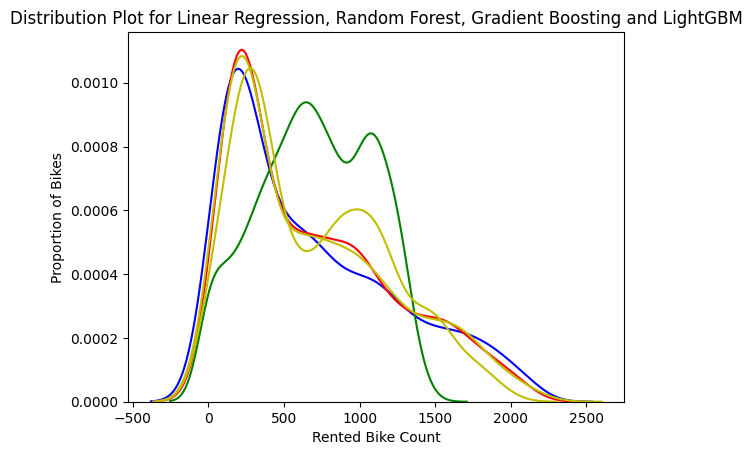

In [30]:
# Distribution plot

import seaborn as sns

sns.distplot(y_test, hist=False, color='b', label='Actual')
sns.distplot(lr_predictions, hist=False, color='g', label='Linear Regression')
sns.distplot(rf_predictions, hist=False, color='r', label='Random Forest')
sns.distplot(gb_predictions, hist=False, color='y', label='Gradient Boosting')
sns.distplot(lgb_predictions, hist=False, color='y', label='LightGBM')

plt.title('Distribution Plot for Linear Regression, Random Forest, Gradient Boosting and LightGBM')
plt.xlabel('Rented Bike Count')
plt.ylabel('Proportion of Bikes')
plt.show()

## **_Hyperparameter Tuning for LightGBM_**

In [32]:
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMRegressor

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7],
    'num_leaves': [31, 61, 91]
}

# Create the LightGBM regressor
lgbm = LGBMRegressor(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=lgbm, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Train the LightGBM model with the best parameters
best_lgbm = LGBMRegressor(random_state=42, **best_params)
best_lgbm.fit(X_train, y_train)

LGBMRegressor(max_depth=7, n_estimators=300, num_leaves=91, random_state=42)

In [33]:
# Assuming you have a test set (X_test, y_test)
y_pred = best_lgbm.predict(X_test)

# Calculate different evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Mean Squared Error: 17247.30982926247
Mean Absolute Error: 75.78134403069707
R-squared: 0.9448351834474558


In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define the parameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the Random Forest regressor
rf = RandomForestRegressor(random_state=42)

# Perform grid search with cross-validation
rf_grid_search = GridSearchCV(estimator=rf, param_grid=rf_param_grid, cv=5, scoring='neg_mean_squared_error')
rf_grid_search.fit(X_train, y_train)

# Get the best parameters and best score for Random Forest
rf_best_params = rf_grid_search.best_params_
rf_best_score = rf_grid_search.best_score_

# Train the Random Forest model with the best parameters
best_rf = RandomForestRegressor(random_state=42, **rf_best_params)
best_rf.fit(X_train, y_train)

# Assuming you have a test set (X_test, y_test)
rf_y_pred = best_rf.predict(X_test)

# Calculate different evaluation metrics for Random Forest
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_mae = mean_absolute_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)

print(f"Random Forest - Mean Squared Error: {rf_mse}")
print(f"Random Forest - Mean Absolute Error: {rf_mae}")
print(f"Random Forest - R-squared: {rf_r2}")

Random Forest - Mean Squared Error: 51940.69294799495
Random Forest - Mean Absolute Error: 155.60705909120043
Random Forest - R-squared: 0.833869813527279


In [36]:
from sklearn.ensemble import GradientBoostingRegressor

# Define the parameter grid for Gradient Boosting
gb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the Gradient Boosting regressor
gb = GradientBoostingRegressor(random_state=42)

# Perform grid search with cross-validation
gb_grid_search = GridSearchCV(estimator=gb, param_grid=gb_param_grid, cv=5, scoring='neg_mean_squared_error')
gb_grid_search.fit(X_train, y_train)

# Get the best parameters and best score for Gradient Boosting
gb_best_params = gb_grid_search.best_params_
gb_best_score = gb_grid_search.best_score_

# Train the Gradient Boosting model with the best parameters
best_gb = GradientBoostingRegressor(random_state=42, **gb_best_params)
best_gb.fit(X_train, y_train)

# Assuming you have a test set (X_test, y_test)
gb_y_pred = best_gb.predict(X_test)

# Calculate different evaluation metrics for Gradient Boosting
gb_mse = mean_squared_error(y_test, gb_y_pred)
gb_mae = mean_absolute_error(y_test, gb_y_pred)
gb_r2 = r2_score(y_test, gb_y_pred)

print(f"Gradient Boosting - Mean Squared Error: {gb_mse}")
print(f"Gradient Boosting - Mean Absolute Error: {gb_mae}")
print(f"Gradient Boosting - R-squared: {gb_r2}")


Gradient Boosting - Mean Squared Error: 16730.282130180512
Gradient Boosting - Mean Absolute Error: 72.47460249741968
Gradient Boosting - R-squared: 0.9464888754408616


In [37]:
# Evaluate Linear Regression model
lr_mae = mean_absolute_error(y_test, lr_predictions)
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)

# Print evaluation metrics
print("Linear Regression Metrics:")
print(f"MAE: {lr_mae:.2f}")
print(f"MSE: {lr_mse:.2f}")
print(f"R-squared: {lr_r2:.2f}")
print("\nRandom Forest Metrics:")
print(f"MAE: {rf_mae:.2f}")
print(f"MSE: {rf_mse:.2f}")
print(f"R-squared: {rf_r2:.2f}")
print("\nGradient Boosting Metrics:")
print(f"MAE: {gb_mae:.2f}")
print(f"MSE: {gb_mse:.2f}")
print(f"R-squared: {gb_r2:.2f}")
print("\nLightGBM Metrics:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R-squared: {r2:.2f}")


Linear Regression Metrics:
MAE: 317.54
MSE: 162876.52
R-squared: 0.48

Random Forest Metrics:
MAE: 155.61
MSE: 51940.69
R-squared: 0.83

Gradient Boosting Metrics:
MAE: 72.47
MSE: 16730.28
R-squared: 0.95

LightGBM Metrics:
MAE: 75.78
MSE: 17247.31
R-squared: 0.94


In [47]:
df_predictions = pd.DataFrame({'Actual': y_test, 'Linear Regression': lr_predictions, 'Random Forest': rf_predictions, 'Gradient Boosting': gb_predictions, 'LightGBM': y_pred})
df_predictions

Actual  Linear Regression  Random Forest  Gradient Boosting     LightGBM
5993    1210        1222.848585        1232.70        1450.694206  1211.236520
5340     951         859.897130         973.40         921.029643   981.797481
5951     929        1140.289797         942.93        1121.494037  1005.633538
879      371         605.451349         346.95         236.050699   383.801400
6909    1236        1226.693109        1656.76        1533.686425  1657.402660
...      ...                ...            ...                ...          ...
3407     975         993.881239         840.64         775.890965   839.923876
7716    1114        1225.838584        1076.20         996.243254  1003.749630
4980       8          63.397137          38.53          69.936990   124.184669
4860    1176        1067.681576        1131.68        1131.603288  1095.529784
4246    1584         970.066833        1480.11        1376.704442  1479.982897

[1693 rows x 5 columns]

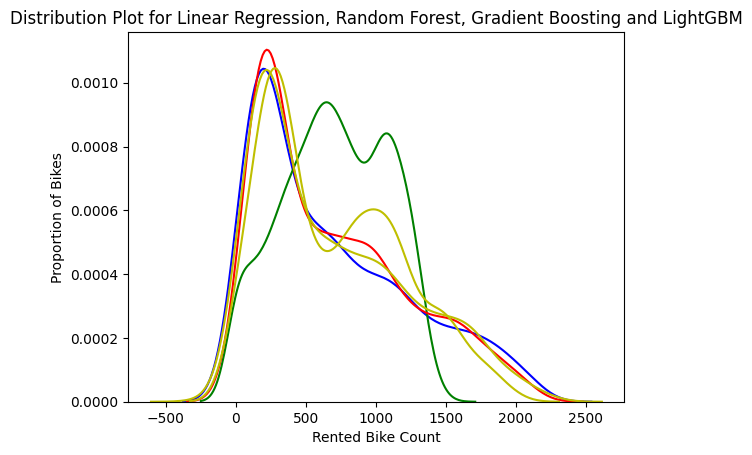

In [48]:
# Distribution plot

import seaborn as sns

sns.distplot(y_test, hist=False, color='b', label='Actual')
sns.distplot(lr_predictions, hist=False, color='g', label='Linear Regression')
sns.distplot(rf_predictions, hist=False, color='r', label='Random Forest')
sns.distplot(gb_predictions, hist=False, color='y', label='Gradient Boosting')
sns.distplot(y_pred, hist=False, color='y', label='LightGBM')

plt.title('Distribution Plot for Linear Regression, Random Forest, Gradient Boosting and LightGBM')
plt.xlabel('Rented Bike Count')
plt.ylabel('Proportion of Bikes')
plt.show()

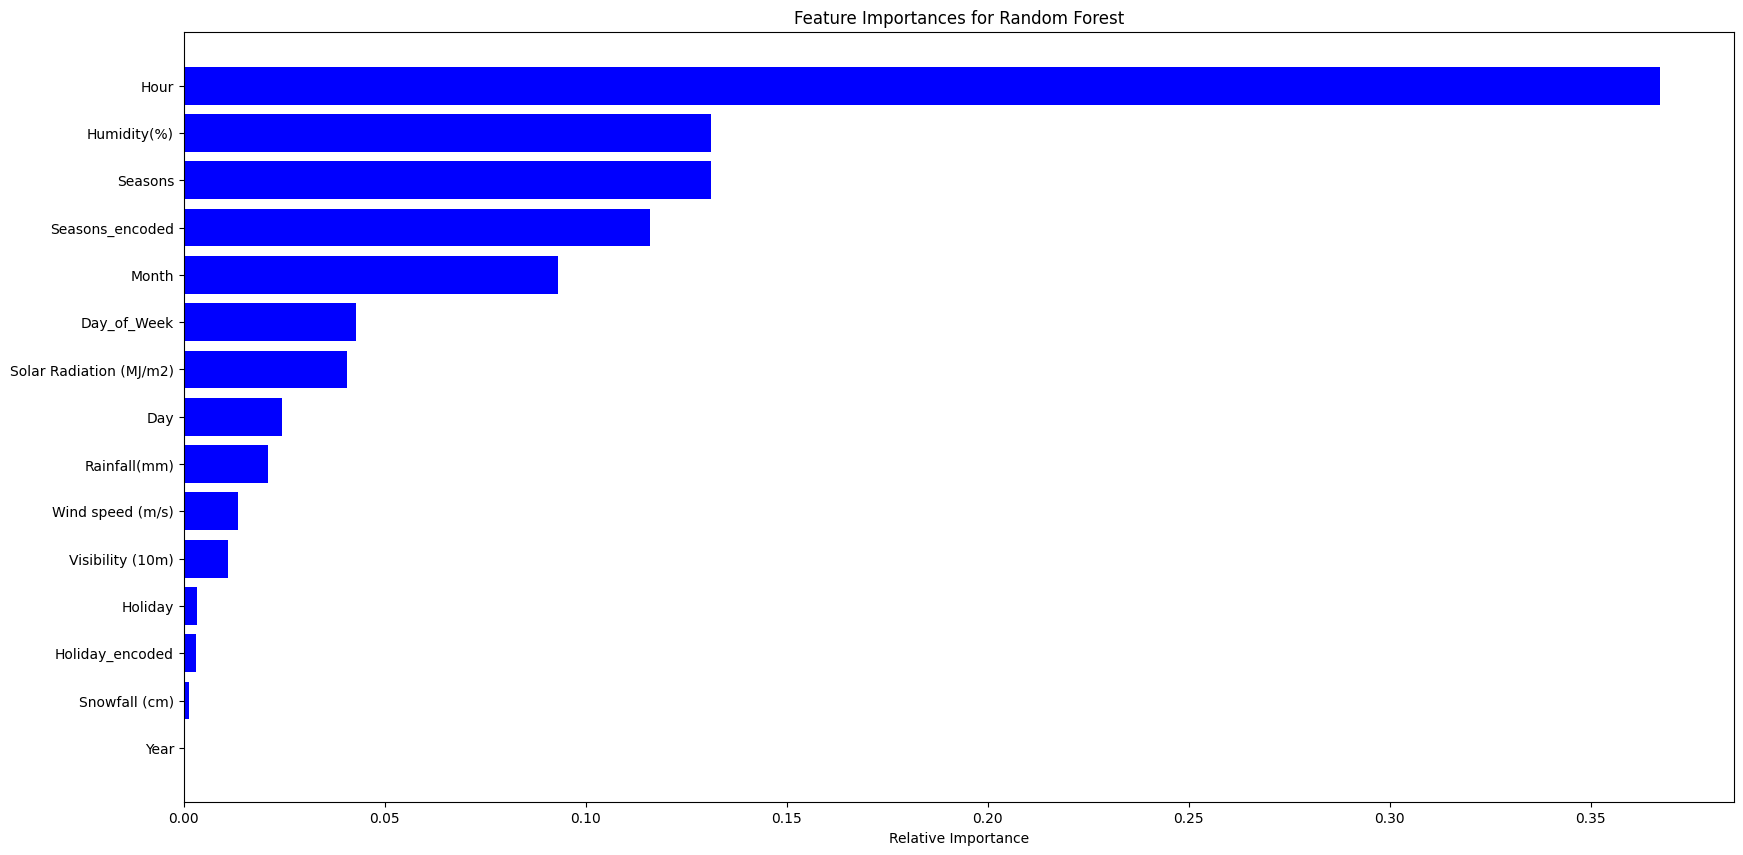

In [49]:
# Plotting the feature importances
# Feature importances for random forest model are calculated using the mean decrease in impurity method

import numpy as np

feature_importances = rf_model.feature_importances_
feature_names = X.columns
indices = np.argsort(feature_importances)

plt.figure(figsize=(20, 10))
plt.title('Feature Importances for Random Forest')
plt.barh(range(len(indices)), feature_importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

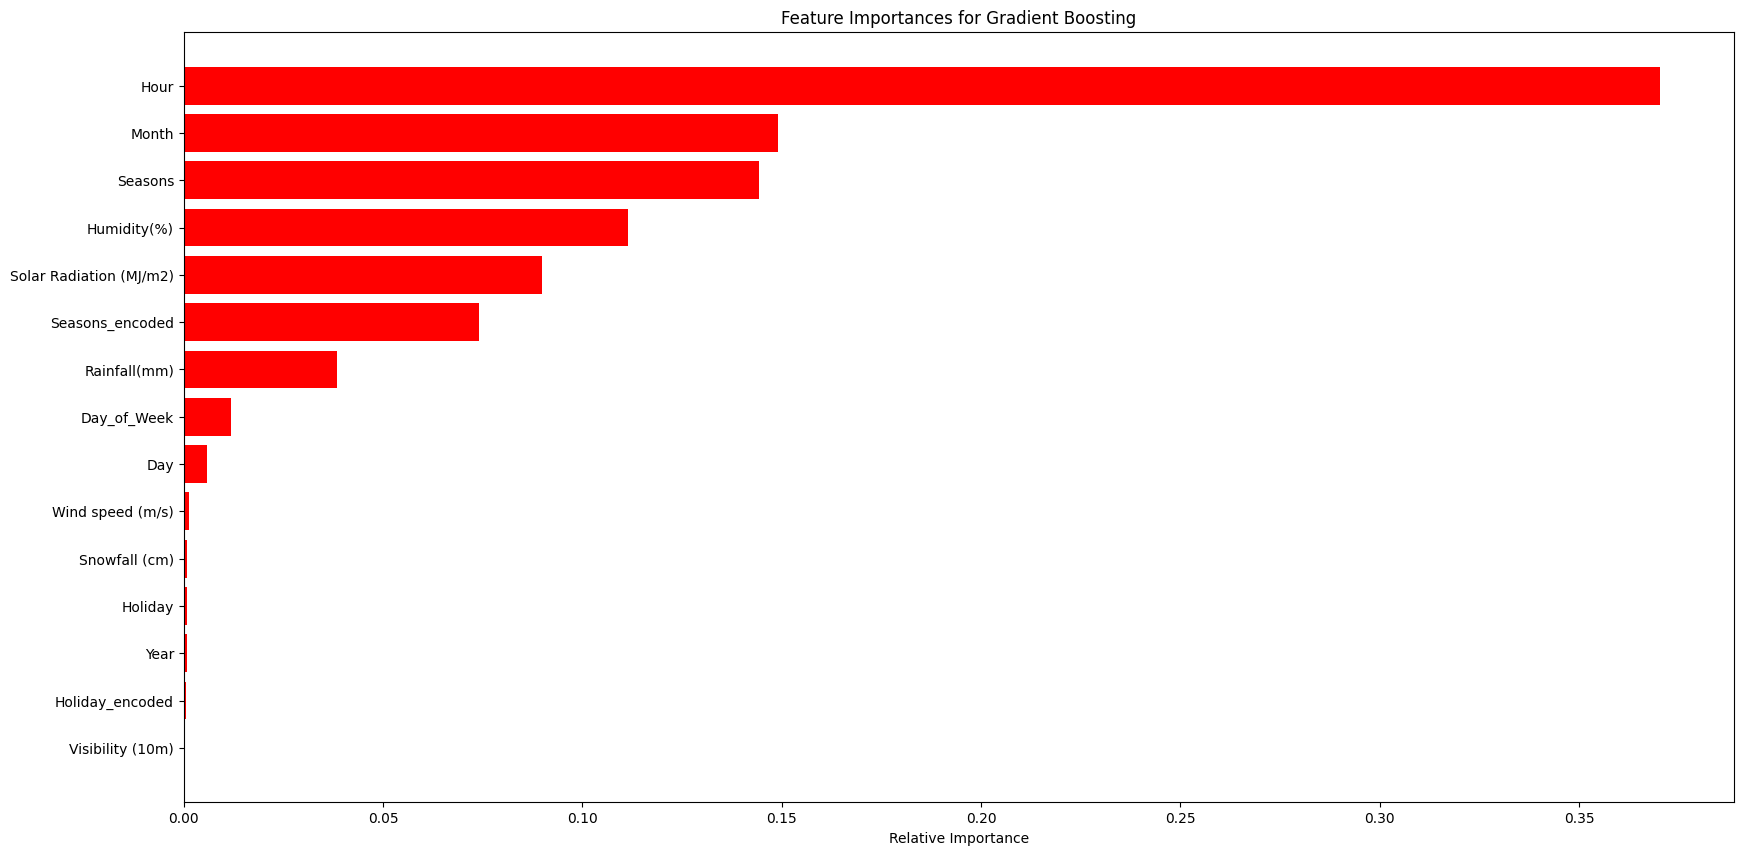

In [50]:
# Plotting the feature importances
# Feature importances for gradient boosting model are calculated using the mean decrease in impurity method

feature_importances = gb_model.feature_importances_
feature_names = X.columns
indices = np.argsort(feature_importances)

plt.figure(figsize=(20, 10))
plt.title('Feature Importances for Gradient Boosting')
plt.barh(range(len(indices)), feature_importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

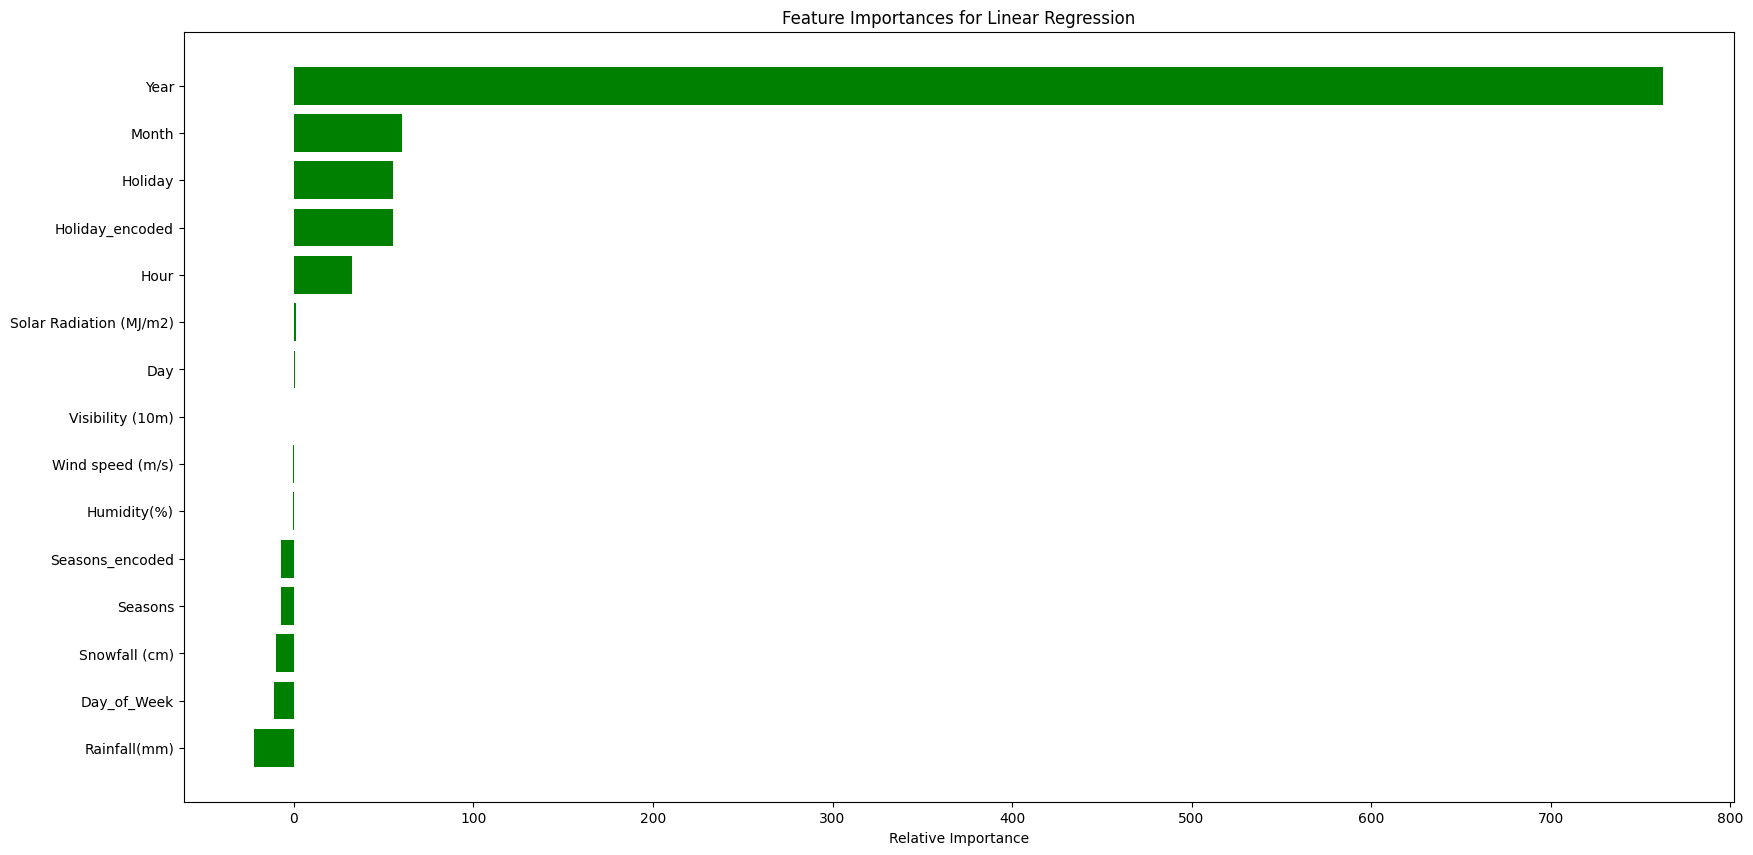

In [51]:
# Plotting the feature importances
# Feature importances for linear regression model are calculated using the coefficients

feature_importances = lr_model.coef_
feature_names = X.columns
indices = np.argsort(feature_importances)

plt.figure(figsize=(20, 10))
plt.title('Feature Importances for Linear Regression')
plt.barh(range(len(indices)), feature_importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

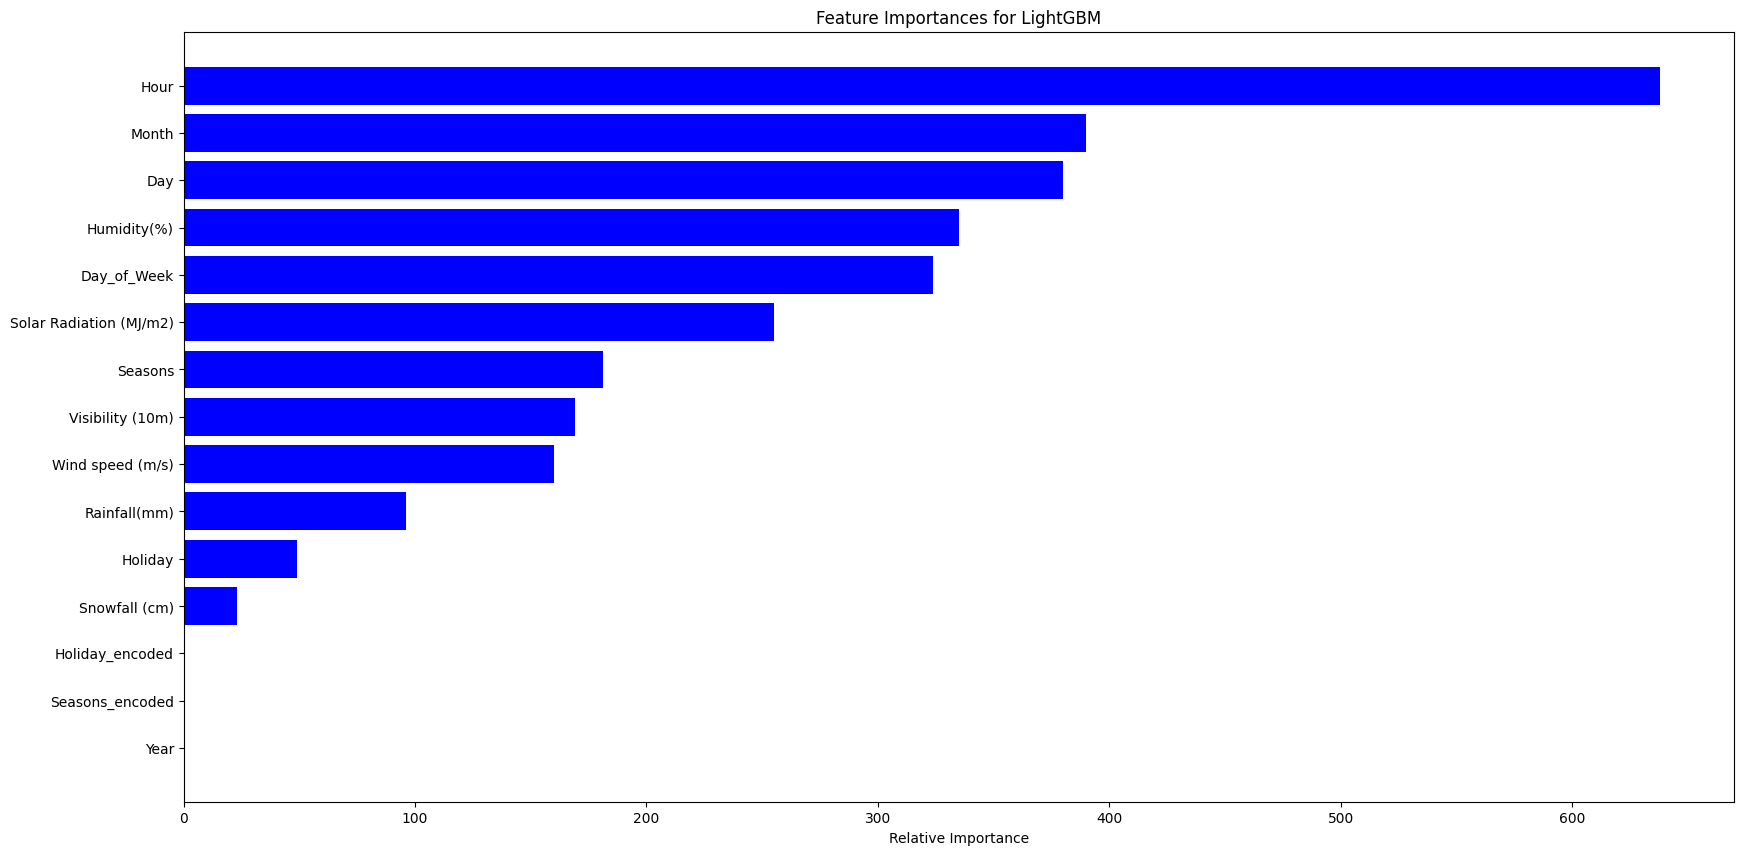

In [52]:
# Plotting the feature importances
# Feature importances for LightGBM model are calculated using the feature importance attribute

feature_importances = lgb_model.feature_importances_
feature_names = X.columns
indices = np.argsort(feature_importances)

plt.figure(figsize=(20, 10))
plt.title('Feature Importances for LightGBM')
plt.barh(range(len(indices)), feature_importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

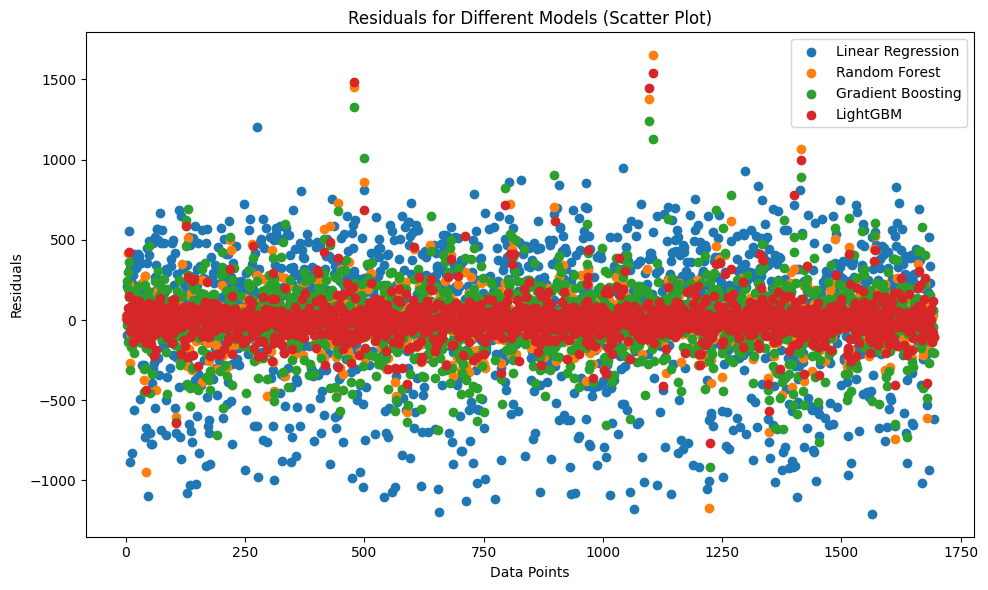

In [62]:
# Defining the models and calculating residuals
models = ['Linear Regression', 'Random Forest', 'Gradient Boosting', 'LightGBM']
residuals = [df_predictions[model] - df_predictions['Actual'] for model in models]

# Creating a scatter plot for residuals
fig, scatterplot_ax = plt.subplots(figsize=(10, 6))

for i, model in enumerate(models):
    x = np.arange(1, len(residuals[i]) + 1) + i * 0.2
    scatterplot_ax.scatter(x, residuals[i], label=model)

# Adding a title and axis labels to the scatter plot
scatterplot_ax.set_title('Residuals for Different Models (Scatter Plot)')
scatterplot_ax.set_xlabel('Data Points')
scatterplot_ax.set_ylabel('Residuals')
scatterplot_ax.legend()

# Adjusting spacing between subplots
plt.tight_layout()

# Displaying the plot
plt.show()